In [1]:
import zipfile

# Open the zip file in read mode ('r')
with zipfile.ZipFile('bike+sharing+dataset.zip', 'r') as zip_ref:
    # Extract all contents into a specific directory
    zip_ref.extractall('dataset')


## loading depenedencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Dataset understanding

In [3]:
data_day = pd.read_csv('dataset/day.csv')
data_hour = pd.read_csv('dataset/hour.csv')

In [4]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
description = data_day.describe()
data_shape = data_day.shape
data_size = data_day.size

print(f"Complete Description:\n{'-'*50}\nData description:\n{description}\n{'-'*50}\nData shape: {data_shape}\n{'-'*50}\nData size: {data_size}")

Complete Description:
--------------------------------------------------
Data description:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995

In [7]:
description = data_hour.describe()
data_shape = data_hour.shape
data_size = data_hour.size

print(f"Complete Description:\n{'-'*50}\nData description:\n{description}\n{'-'*50}\nData shape: {data_shape}\n{'-'*50}\nData size: {data_size}")

Complete Description:
--------------------------------------------------
Data description:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.42

## Temporal Dependency Analysis — Daily Dataset (`day.csv`)

### Objective
Before training any sequence-based models (LSTM, GRU), it is essential to understand **whether past bike rental demand influences future demand**, and if so, **how far into the past this influence extends**.

This step helps us:
- Justify the use of sequence models
- Decide reasonable sequence lengths (e.g., 3, 7, 14 days)
- Avoid arbitrary hyperparameter choices
- Ensure fair and scientifically grounded model comparisons

### Why this analysis is necessary
Although `day.csv` represents a time-ordered dataset, not all time-series data exhibit strong temporal dependency.  
If correlations decay quickly, long sequences may add noise rather than useful information.

Therefore, we begin with **temporal dependency analysis on the target variable (`cnt`) only**, without involving any model training.

### Dataset under analysis
- Dataset: `day.csv`
- Granularity: Daily
- Target variable: `cnt` (total daily bike rentals)

In this section, we will:
1. Ensure proper datetime formatting and ordering
2. Perform statistical temporal analysis in later steps


In [8]:
# Step 1: Ensure datetime format and correct temporal ordering

# Convert date column to datetime
data_day['dteday'] = pd.to_datetime(data_day['dteday'])

# Sort data by date to maintain chronological order
data_day = data_day.sort_values('dteday').reset_index(drop=True)

# Display basic confirmation
data_day[['dteday', 'cnt']].head()


,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


## Step 2: Visual Lag Analysis (Daily Data)

### Why start with lag plots?
Before applying statistical tools like autocorrelation, it is useful to visually inspect how
current bike demand relates to its immediate past values.

Lag plots help us answer:
- Is there a visible relationship between demand today and demand yesterday?
- Is the relationship linear, clustered, or random?
- Does temporal dependency appear strong or weak?

This provides intuitive insight before relying on numerical correlation values.


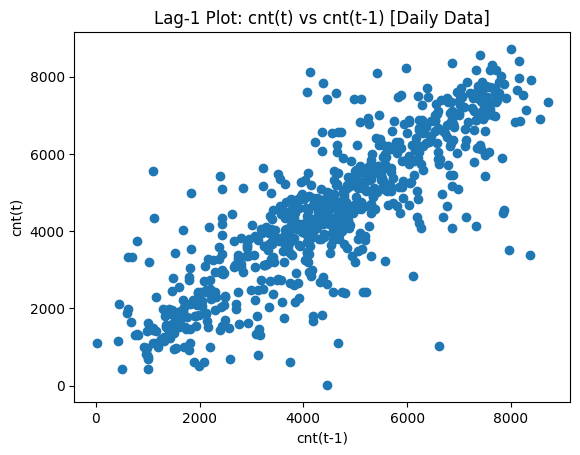

In [9]:
# Step 2: Lag-1 plot for daily bike demand
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data_day['cnt'], lag=1)
plt.title("Lag-1 Plot: cnt(t) vs cnt(t-1) [Daily Data]")
plt.xlabel("cnt(t-1)")
plt.ylabel("cnt(t)")
plt.savefig('fig-1-cnt-vs-daily-data.png')
plt.show()


## Step 3: Autocorrelation Analysis (ACF) — Daily Data

### Purpose
The lag plot confirmed the presence of short-term temporal dependency.
We now quantify this dependency using the **Autocorrelation Function (ACF)**.

ACF measures the correlation between:
- `cnt(t)` and `cnt(t−k)` for multiple lags `k`

This helps us answer:
- How quickly does temporal dependency decay?
- Do longer lags (e.g., 7 or 14 days) still carry useful information?
- Where does correlation become negligible?

These insights are critical for selecting reasonable sequence lengths
for LSTM and GRU models.


<Figure size 640x480 with 0 Axes>

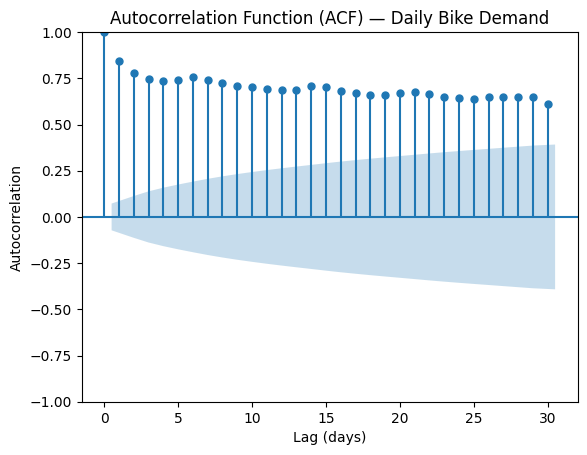

In [10]:
# Step 3: Autocorrelation Function (ACF) for daily bike demand

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure()
plot_acf(data_day['cnt'], lags=30)
plt.title("Autocorrelation Function (ACF) — Daily Bike Demand")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.savefig('fig-2-Autocorrelation Function (ACF) - Daily Bike Demand.png')
plt.show()


## Step 4: Partial Autocorrelation Analysis (PACF) — Daily Data

### Why PACF is needed
The ACF shows strong correlations across many lags, but these correlations may be
**indirect**, arising from shared trends or seasonality.

Partial Autocorrelation Function (PACF) measures the **direct contribution** of each lag
after removing the influence of all shorter lags.

PACF helps us answer:
- Which lags provide unique information?
- Where does additional historical context stop being useful?
- How far back should sequence models realistically look?

This analysis is crucial for selecting effective sequence lengths without introducing redundancy.


<Figure size 640x480 with 0 Axes>

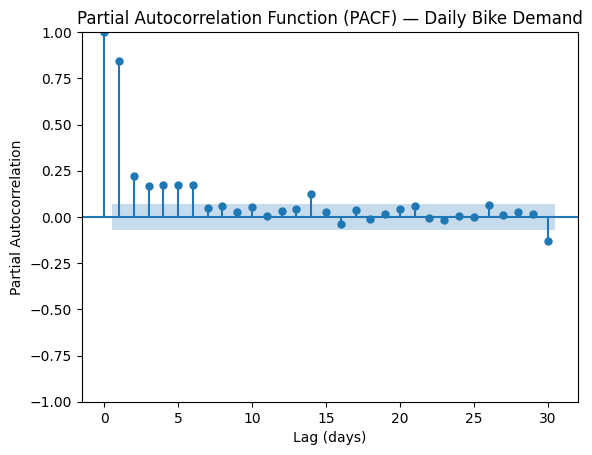

In [11]:
# Step 4: Partial Autocorrelation Function (PACF) for daily bike demand

from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure()
plot_pacf(data_day['cnt'], lags=30, method='ywm')
plt.title("Partial Autocorrelation Function (PACF) — Daily Bike Demand")
plt.xlabel("Lag (days)")
plt.ylabel("Partial Autocorrelation")
plt.savefig('fig-3-Partial Autocorrelation Function (PACF) - Daily Bike Demand.png')
plt.show()


## Temporal Dependency Analysis — Hourly Dataset (`hour.csv`)

### Objective
After analyzing the daily dataset, we now examine the **hourly bike rental data** to understand
how temporal dependency behaves at a finer time resolution.

Hourly data captures:
- Short-term demand fluctuations
- Human activity cycles (work hours, commute times)
- Strong intraday and weekly patterns

This analysis helps us:
- Justify the use of LSTM and GRU for hourly prediction
- Determine whether short (24–48 hours) or longer (168 hours) sequences are meaningful
- Compare how temporal dependency differs from daily aggregation

As before, we begin by ensuring proper datetime ordering and then move step by step from
visual intuition to statistical confirmation.


In [12]:
# Step 1 (Hourly): Ensure proper datetime construction and ordering

# Combine date and hour into a single datetime column
data_hour['datetime'] = pd.to_datetime(data_hour['dteday']) + pd.to_timedelta(data_hour['hr'], unit='h')

# Sort chronologically
data_hour = data_hour.sort_values('datetime').reset_index(drop=True)

# Verify ordering
data_hour[['datetime', 'cnt']].head()


,datetime,cnt
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


## Step 2: Lag Plot Analysis (Hourly Data)

### Purpose
Before applying statistical measures, we visually inspect how **current hourly bike demand**
relates to demand in the **previous hour**.

Lag plots help us understand:
- Whether short-term temporal dependency exists
- Whether demand transitions are smooth or highly volatile
- Whether sequence-based models are justified at an hourly resolution

Since hourly data captures fine-grained user behavior, we expect stronger short-term
dependency compared to daily data.


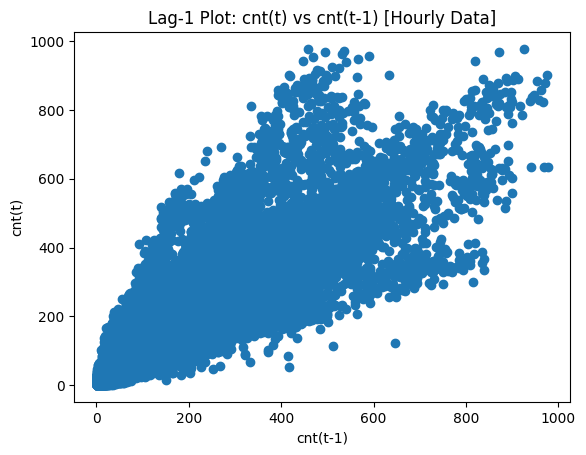

In [13]:
# Step 2 (Hourly): Lag-1 plot for hourly bike demand

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data_hour['cnt'], lag=1)
plt.title("Lag-1 Plot: cnt(t) vs cnt(t-1) [Hourly Data]")
plt.xlabel("cnt(t-1)")
plt.ylabel("cnt(t)")
plt.savefig('fig-4-cnt-vs-hourly-data.png')
plt.show()


## Step 3: Autocorrelation Analysis (ACF) — Hourly Data

### Purpose
The lag plot confirms strong short-term temporal dependency at an hourly level.
We now quantify how long this dependency persists using the **Autocorrelation Function (ACF)**.

ACF helps answer:
- How many past hours influence current demand?
- Is there evidence of daily (24-hour) or weekly (168-hour) cycles?
- Where does autocorrelation decay to negligible levels?

These insights are critical for selecting feasible sequence lengths for LSTM and GRU models.


<Figure size 640x480 with 0 Axes>

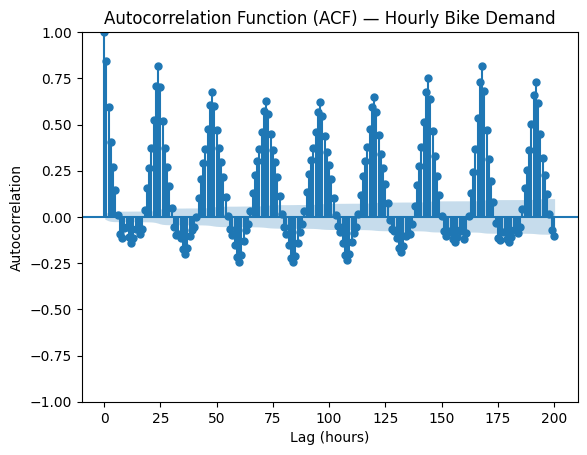

In [14]:
# Step 3 (Hourly): Autocorrelation Function (ACF)

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure()
plot_acf(data_hour['cnt'], lags=200)
plt.title("Autocorrelation Function (ACF) — Hourly Bike Demand")
plt.xlabel("Lag (hours)")
plt.ylabel("Autocorrelation")
plt.savefig('fig-5-autocorrelation function(ACF).png')
plt.show()


## Step 4: Partial Autocorrelation Analysis (PACF) — Hourly Data

### Why PACF is necessary
The ACF reveals strong periodic correlations in hourly bike demand.
However, many of these correlations may be **indirect**, arising from dominant daily cycles.

Partial Autocorrelation Function (PACF) helps isolate:
- Which hourly lags provide **direct predictive information**
- Whether longer temporal contexts (e.g., weekly history) contribute independently
- Where the marginal benefit of longer sequences diminishes

This analysis is essential before finalizing sequence lengths for LSTM and GRU models.


<Figure size 640x480 with 0 Axes>

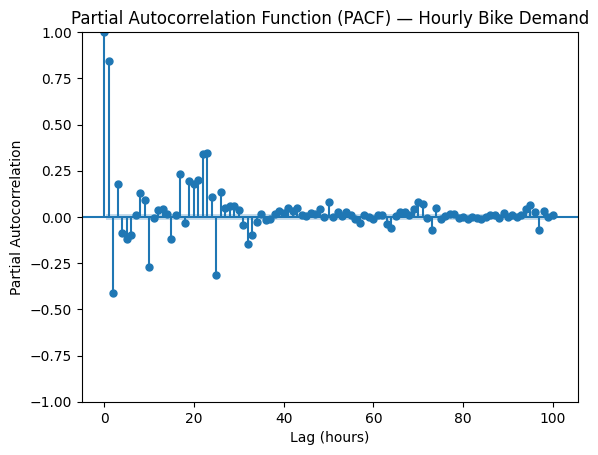

In [15]:
# Step 4 (Hourly): Partial Autocorrelation Function (PACF)

from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure()
plot_pacf(data_hour['cnt'], lags=100, method='ywm')
plt.title("Partial Autocorrelation Function (PACF) — Hourly Bike Demand")
plt.xlabel("Lag (hours)")
plt.ylabel("Partial Autocorrelation")
plt.savefig('fig-6-partial autocorrelation function(PACF).png')
plt.show()


## Summary of Temporal Dependency Analysis

### Daily Dataset (`day.csv`)
- Lag plots indicate moderate short-term temporal dependency.
- ACF shows long-range correlation due to trend and seasonality.
- PACF reveals that direct temporal influence is concentrated within the first 5–7 days.
- Sequence lengths of 3 and 7 days are well justified, while 14 days may introduce redundancy.

### Hourly Dataset (`hour.csv`)
- Lag plots show very strong hour-to-hour dependency.
- ACF reveals pronounced daily (24-hour) and weekly (168-hour) cycles.
- PACF indicates that direct predictive influence is strongest within:
  - The first few hours
  - Around the 24-hour daily cycle
- Longer histories (e.g., 168 hours) provide mostly indirect information and are treated as exploratory.

### Implication for Modeling
- Sequence-based models (LSTM, GRU) are more strongly justified for hourly data.
- Dense models remain competitive, especially for daily data due to strong contextual features.
- Sequence length sensitivity analysis is necessary to understand performance trade-offs.


---
## Preprocessing and Feature Selection Strategy

### Objective
Before training any machine learning or deep learning model, it is essential to prepare the data
in a way that:
- Prevents data leakage
- Preserves temporal structure
- Ensures fair comparison across models and datasets
- Aligns with real-world prediction scenarios

This section defines **what features are used, what are excluded, and why**, separately for
daily and hourly datasets.

---

### Target Variable
- `cnt`: Total number of bike rentals (prediction target)

---

### Feature Exclusion (Data Leakage Prevention)

The following columns are **excluded** from both datasets:

- `casual`
- `registered`

**Reason:**
The target variable is defined as:

`cnt = casual + registered`

Including these features would leak the ground truth into the model, leading to
unrealistically high performance and invalid conclusions.

---

### Identifier Columns (Excluded)

- `instant`: Record index (no predictive value)

---

### Temporal Handling Strategy

- The dataset is **time-ordered**
- No random shuffling is performed
- Train/validation/test splits will respect chronological order

---

### Feature Types Used

#### Categorical / Discrete Features
- `season`
- `yr`
- `mnth`
- `weekday`
- `holiday`
- `workingday`
- `weathersit`
- `hr` (hourly dataset only)

These features capture **seasonality, calendar effects, and weather conditions**.

#### Continuous Features
- `temp`
- `atemp`
- `hum`
- `windspeed`

These represent environmental conditions influencing demand.

---

### Modeling Implications
- Dense models will use features in a **tabular format**
- LSTM and GRU models will use **temporal sequences** of these same features
- No feature is added or removed selectively for any model to ensure fairness


In [16]:
# Step 2: Define feature sets (common preprocessing foundation)

# Target column
TARGET = 'cnt'

# Columns to drop (leakage + identifiers)
DROP_COLS_DAY = ['instant', 'dteday', 'casual', 'registered']
DROP_COLS_HOUR = ['instant', 'dteday', 'datetime', 'casual', 'registered']

# Feature columns
FEATURES_DAY = [col for col in data_day.columns if col not in DROP_COLS_DAY + [TARGET]]
FEATURES_HOUR = [col for col in data_hour.columns if col not in DROP_COLS_HOUR + [TARGET]]

print("Daily features:", FEATURES_DAY)
print("Hourly features:", FEATURES_HOUR)


Daily features: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
Hourly features: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


## Feature Scaling Strategy

### Why scaling is required
Deep learning models, especially sequence-based models (LSTM, GRU), are sensitive to
feature scale. Features with larger numeric ranges can dominate gradient updates and
slow or destabilize training.

In this project:
- Features include both bounded values (e.g., season, weekday)
- And continuous normalized values (e.g., temperature, humidity)

To ensure stable and fair training across all models, feature scaling is applied.

---

### Chosen Scaling Method: Min-Max Scaling

We use **Min-Max Scaling** to map all feature values to the range [0, 1].

**Reasons for choosing Min-Max scaling:**
- Preserves relative relationships between values
- Works well with neural networks
- Matches the normalized nature of several existing features
- Avoids negative values, which helps recurrent networks converge faster

---

### Important Rules Followed
- The scaler is **fit only on training data**
- The same scaler is applied to validation and test data
- Separate scalers are used for:
  - Daily dataset
  - Hourly dataset

This prevents data leakage and ensures realistic evaluation.


In [17]:
# Step 2.1: Initialize scalers for features

from sklearn.preprocessing import MinMaxScaler

scaler_day = MinMaxScaler()
scaler_hour = MinMaxScaler()

print("Scalers initialized for daily and hourly datasets.")


Scalers initialized for daily and hourly datasets.


## Time-Aware Train / Validation / Test Split

### Why random splitting is NOT used
This project deals with time-ordered data. Randomly shuffling samples would:
- Break temporal continuity
- Leak future information into training
- Produce unrealistically optimistic results

To simulate real-world forecasting conditions, all splits are done
**chronologically**.

---

### Split Strategy Used

We divide each dataset into:
- **Training set** → model learning
- **Validation set** → hyperparameter & early stopping decisions
- **Test set** → final, unbiased evaluation

Split ratios:
- **70% Training**
- **15% Validation**
- **15% Test**

---

### Key Rules Followed
- No shuffling
- Validation and test data occur strictly **after** training data
- Same split strategy applied to:
  - Daily dataset
  - Hourly dataset
- Ensures fair comparison across all models


In [18]:
# Step 3: Time-aware split for daily dataset

import numpy as np

# Compute split indices
n_day = len(data_day)
train_end_day = int(0.7 * n_day)
val_end_day = int(0.85 * n_day)

# Split data
train_day = data_day.iloc[:train_end_day]
val_day   = data_day.iloc[train_end_day:val_end_day]
test_day  = data_day.iloc[val_end_day:]

# Verify splits
print("Daily dataset splits:")
print(f"Train size: {len(train_day)}")
print(f"Validation size: {len(val_day)}")
print(f"Test size: {len(test_day)}")

print("\nDate ranges:")
print("Train:", train_day['dteday'].min(), "→", train_day['dteday'].max())
print("Val  :", val_day['dteday'].min(), "→", val_day['dteday'].max())
print("Test :", test_day['dteday'].min(), "→", test_day['dteday'].max())


Daily dataset splits:
Train size: 511
Validation size: 110
Test size: 110

Date ranges:
Train: 2011-01-01 00:00:00 → 2012-05-25 00:00:00
Val  : 2012-05-26 00:00:00 → 2012-09-12 00:00:00
Test : 2012-09-13 00:00:00 → 2012-12-31 00:00:00


## Time-Aware Train / Validation / Test Split — Hourly Data

The same chronological splitting strategy used for the daily dataset is now
applied to the hourly dataset.

This ensures:
- Consistency across datasets
- Fair comparison between models
- No leakage of future information

The split ratios remain:
- 70% Training
- 15% Validation
- 15% Test


In [19]:
# Step 3: Time-aware split for hourly dataset

# Compute split indices
n_hour = len(data_hour)
train_end_hour = int(0.7 * n_hour)
val_end_hour = int(0.85 * n_hour)

# Split data
train_hour = data_hour.iloc[:train_end_hour]
val_hour   = data_hour.iloc[train_end_hour:val_end_hour]
test_hour  = data_hour.iloc[val_end_hour:]

# Verify splits
print("Hourly dataset splits:")
print(f"Train size: {len(train_hour)}")
print(f"Validation size: {len(val_hour)}")
print(f"Test size: {len(test_hour)}")

print("\nDatetime ranges:")
print("Train:", train_hour['datetime'].min(), "→", train_hour['datetime'].max())
print("Val  :", val_hour['datetime'].min(), "→", val_hour['datetime'].max())
print("Test :", test_hour['datetime'].min(), "→", test_hour['datetime'].max())


Hourly dataset splits:
Train size: 12165
Validation size: 2607
Test size: 2607

Datetime ranges:
Train: 2011-01-01 00:00:00 → 2012-05-27 01:00:00
Val  : 2012-05-27 02:00:00 → 2012-09-12 16:00:00
Test : 2012-09-12 17:00:00 → 2012-12-31 23:00:00


## Feature Scaling — Training Data Only

### Why scalers are fit only on training data
To prevent data leakage, scaling parameters (min and max values) must be learned
**exclusively from the training set**.

If validation or test data influence the scaler:
- Future information leaks into training
- Evaluation results become optimistic
- Model performance is no longer realistic

---

### Scaling Procedure
1. Extract feature columns
2. Fit Min-Max scaler on training features only
3. Apply the same transformation to:
   - Training data
   - Validation data
   - Test data

This process is performed separately for:
- Daily dataset
- Hourly dataset


In [20]:
# Step 4: Fit Min-Max scalers using training data only

# Daily dataset
scaler_day.fit(train_day[FEATURES_DAY])

# Hourly dataset
scaler_hour.fit(train_hour[FEATURES_HOUR])

print("Scalers fitted using training data only.")


Scalers fitted using training data only.


## Feature Transformation Using Fitted Scalers

### Objective
With scalers fitted on training data only, we now transform all feature sets
(training, validation, and test) into a normalized numerical format suitable
for deep learning models.

### Important Considerations
- The same scaler is applied consistently across splits
- Target variable (`cnt`) is **not scaled**
- Output features are converted to NumPy arrays for efficient computation

At this stage:
- Dense models will consume these feature matrices directly
- Sequence models will later consume sequences constructed from these matrices


In [21]:
# Step 4.1: Transform daily dataset features

# Daily features
X_train_day = scaler_day.transform(train_day[FEATURES_DAY])
X_val_day   = scaler_day.transform(val_day[FEATURES_DAY])
X_test_day  = scaler_day.transform(test_day[FEATURES_DAY])

# Daily targets
y_train_day = train_day[TARGET].values
y_val_day   = val_day[TARGET].values
y_test_day  = test_day[TARGET].values

# Verify shapes
print("Daily data shapes:")
print("X_train:", X_train_day.shape, "y_train:", y_train_day.shape)
print("X_val  :", X_val_day.shape, "y_val  :", y_val_day.shape)
print("X_test :", X_test_day.shape, "y_test :", y_test_day.shape)


Daily data shapes:
X_train: (511, 11) y_train: (511,)
X_val  : (110, 11) y_val  : (110,)
X_test : (110, 11) y_test : (110,)


## Feature Transformation — Hourly Dataset

The same scaling strategy used for the daily dataset is now applied to the
hourly dataset using the scaler fitted on hourly training data.

This ensures:
- Consistent feature scaling
- No data leakage
- Fair comparison across datasets and models


In [22]:
# Step 4.2: Transform hourly dataset features

# Hourly features
X_train_hour = scaler_hour.transform(train_hour[FEATURES_HOUR])
X_val_hour   = scaler_hour.transform(val_hour[FEATURES_HOUR])
X_test_hour  = scaler_hour.transform(test_hour[FEATURES_HOUR])

# Hourly targets
y_train_hour = train_hour[TARGET].values
y_val_hour   = val_hour[TARGET].values
y_test_hour  = test_hour[TARGET].values

# Verify shapes
print("Hourly data shapes:")
print("X_train:", X_train_hour.shape, "y_train:", y_train_hour.shape)
print("X_val  :", X_val_hour.shape, "y_val  :", y_val_hour.shape)
print("X_test :", X_test_hour.shape, "y_test :", y_test_hour.shape)


Hourly data shapes:
X_train: (12165, 12) y_train: (12165,)
X_val  : (2607, 12) y_val  : (2607,)
X_test : (2607, 12) y_test : (2607,)


## Sequence Generation Strategy for LSTM and GRU Models

### Why sequence generation is required
Dense (MLP) models treat each data point independently and consume features
in a 2D tabular format:  
(samples × features).

However, sequence-based models (LSTM, GRU) require inputs in the form:
```(samples × timesteps × features)```

This allows the model to learn **temporal dependencies** across consecutive
time steps.

---

### Sequence Lengths Used (Based on Temporal Analysis)

Based on earlier ACF and PACF analysis:

#### Daily Dataset
- 3 days
- 7 days
- 14 days (exploratory)

#### Hourly Dataset
- 24 hours (1 day)
- 48 hours (2 days)
- 168 hours (1 week, exploratory)

These sequence lengths were **not arbitrarily chosen**, but derived from
empirical temporal dependency analysis.

---

### Key Design Principles
- Sequences are created **within each split only**
- No sequence crosses train/validation/test boundaries
- The target corresponds to the **next time step after the sequence**
- Feature scaling is already applied before sequence creation

This ensures:
- No future leakage
- Realistic forecasting behavior
- Fair comparison across models


In [23]:
# Step 5: Define a generic sequence generation function

import numpy as np

def create_sequences(X, y, seq_length):
    """
    Create input-output sequences for time series models.

    Parameters:
    X : np.ndarray
        Feature matrix of shape (samples, features)
    y : np.ndarray
        Target vector of shape (samples,)
    seq_length : int
        Number of past timesteps to include in each sequence

    Returns:
    X_seq : np.ndarray
        Sequence input of shape (samples - seq_length, seq_length, features)
    y_seq : np.ndarray
        Target values corresponding to each sequence
    """
    X_seq, y_seq = [], []
    
    for i in range(seq_length, len(X)):
        X_seq.append(X[i-seq_length:i])
        y_seq.append(y[i])
    
    return np.array(X_seq), np.array(y_seq)


## Automated Daily Sequence Generation (All Sequence Lengths)

### Objective
After validating the sequence generation logic using a 3-day window, we now
automate the process to generate sequences for **all planned daily sequence lengths**.

### Sequence lengths evaluated
- 3 days
- 7 days
- 14 days (exploratory)

### Why automation is safe now
- Sequence logic has been validated
- Shapes and target alignment are correct
- No data leakage across splits

The generated sequences will be stored in a structured dictionary to enable
systematic experimentation and fair comparison across models.


In [24]:
# Step 6.1: Generate daily sequences for all sequence lengths

daily_seq_lengths = [3, 7, 14]

daily_sequences = {}

for seq_len in daily_seq_lengths:
    daily_sequences[seq_len] = {
        "train": create_sequences(X_train_day, y_train_day, seq_len),
        "val":   create_sequences(X_val_day, y_val_day, seq_len),
        "test":  create_sequences(X_test_day, y_test_day, seq_len)
    }
    
    X_tr, y_tr = daily_sequences[seq_len]["train"]
    X_v, y_v   = daily_sequences[seq_len]["val"]
    X_te, y_te = daily_sequences[seq_len]["test"]
    
    print(f"Daily sequences (seq_len = {seq_len}):")
    print("  Train:", X_tr.shape, y_tr.shape)
    print("  Val  :", X_v.shape, y_v.shape)
    print("  Test :", X_te.shape, y_te.shape)
    print("-" * 50)


Daily sequences (seq_len = 3):
  Train: (508, 3, 11) (508,)
  Val  : (107, 3, 11) (107,)
  Test : (107, 3, 11) (107,)
--------------------------------------------------
Daily sequences (seq_len = 7):
  Train: (504, 7, 11) (504,)
  Val  : (103, 7, 11) (103,)
  Test : (103, 7, 11) (103,)
--------------------------------------------------
Daily sequences (seq_len = 14):
  Train: (497, 14, 11) (497,)
  Val  : (96, 14, 11) (96,)
  Test : (96, 14, 11) (96,)
--------------------------------------------------


## Automated Hourly Sequence Generation (All Sequence Lengths)

### Objective
With the daily sequence generation pipeline validated, we now apply the same
automated approach to the hourly dataset.

Hourly data exhibits stronger and more complex temporal dependency, including
daily and weekly cycles. To capture this behavior, multiple sequence lengths
are evaluated.

### Sequence lengths evaluated
- 24 hours (daily cycle)
- 48 hours (two-day continuity)
- 168 hours (weekly context, exploratory)

These values were selected based on prior ACF and PACF analysis.


In [25]:
# Step 6.2: Generate hourly sequences for all sequence lengths

hourly_seq_lengths = [24, 48, 168]

hourly_sequences = {}

for seq_len in hourly_seq_lengths:
    hourly_sequences[seq_len] = {
        "train": create_sequences(X_train_hour, y_train_hour, seq_len),
        "val":   create_sequences(X_val_hour, y_val_hour, seq_len),
        "test":  create_sequences(X_test_hour, y_test_hour, seq_len)
    }
    
    X_tr, y_tr = hourly_sequences[seq_len]["train"]
    X_v, y_v   = hourly_sequences[seq_len]["val"]
    X_te, y_te = hourly_sequences[seq_len]["test"]
    
    print(f"Hourly sequences (seq_len = {seq_len}):")
    print("  Train:", X_tr.shape, y_tr.shape)
    print("  Val  :", X_v.shape, y_v.shape)
    print("  Test :", X_te.shape, y_te.shape)
    print("-" * 50)


Hourly sequences (seq_len = 24):
  Train: (12141, 24, 12) (12141,)
  Val  : (2583, 24, 12) (2583,)
  Test : (2583, 24, 12) (2583,)
--------------------------------------------------
Hourly sequences (seq_len = 48):
  Train: (12117, 48, 12) (12117,)
  Val  : (2559, 48, 12) (2559,)
  Test : (2559, 48, 12) (2559,)
--------------------------------------------------
Hourly sequences (seq_len = 168):
  Train: (11997, 168, 12) (11997,)
  Val  : (2439, 168, 12) (2439,)
  Test : (2439, 168, 12) (2439,)
--------------------------------------------------


## Dense Neural Network (MLP) — Baseline Model

### Purpose
The Dense Neural Network serves as a **feature-driven baseline** that does not
explicitly model temporal sequences. Each sample is treated independently.

This model answers the question:
> How well can bike demand be predicted using contextual features alone?

---

### Why Dense is an important baseline
- Many real-world forecasting problems are effectively solved using engineered features
- Time-related information (hour, weekday, season) is already encoded as features
- Provides a strong reference point to evaluate the added value of LSTM and GRU

---

### Model Design Principles
- Same architecture used for:
  - Daily dataset
  - Hourly dataset
- Prevents bias toward any dataset
- Keeps comparisons fair and interpretable

---

### Architecture Overview
- Input layer → feature dimension
- Hidden layers:
  - Dense (64 units, ReLU)
  - Dense (32 units, ReLU)
- Output layer:
  - Dense (1 unit, linear activation)

---

### Training Configuration
- Loss function: Mean Squared Error (MSE)
- Optimizer: Adam
- Early stopping based on validation loss
- Same training settings across datasets


In [26]:
# Step 7: Define Dense (MLP) baseline model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def build_dense_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1)  # Linear output for regression
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

print("Dense model builder defined.")


Dense model builder defined.


## Dense Neural Network Training — Daily Dataset

### Objective
In this step, we train the Dense (MLP) baseline model on the **daily dataset**.
Each day is treated as an independent sample using contextual and environmental
features.

This model serves as a **non-sequential baseline**, allowing us to later assess
whether explicit temporal modeling (LSTM, GRU) provides additional benefits.

---

### Training Setup
- Input: Scaled daily feature matrix
- Target: Daily bike rental count (`cnt`)
- Loss function: Mean Squared Error (MSE)
- Metric: Mean Absolute Error (MAE)
- Optimizer: Adam
- Early stopping based on validation loss

The same architecture and training configuration will be reused for
hourly data to ensure fair comparison.


In [27]:
# Step 8: Train Dense (MLP) model on daily dataset

# Build model
dense_day_model = build_dense_model(input_dim=X_train_day.shape[1])

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train model
history_dense_day = dense_day_model.fit(
    X_train_day, y_train_day,
    validation_data=(X_val_day, y_val_day),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("Dense model training on daily dataset completed.")


Epoch 1/100


c:\Users\Suvam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 16903386.0000 - mae: 3793.6904 - val_loss: 46347976.0000 - val_mae: 6754.1846
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16896818.0000 - mae: 3792.8606 - val_loss: 46330420.0000 - val_mae: 6752.8857
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16884890.0000 - mae: 3791.3059 - val_loss: 46295108.0000 - val_mae: 6750.2734
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16862774.0000 - mae: 3788.4426 - val_loss: 46232280.0000 - val_mae: 6745.6187
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16824800.0000 - mae: 3783.6428 - val_loss: 46129980.0000 - val_mae: 6738.0352
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16765450.0000 - mae: 3776.0950 - val_loss: 45974980.0000 - val_mae: 6726.5249
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16678355.0000 - mae: 3764.9043 - val_loss: 45749544.0000 - val_mae: 6709.7476
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

## Training and Validation Curves — Dense Model (Daily Data)

To understand the learning behavior of the Dense model, we visualize:
- Training loss vs validation loss
- Training MAE vs validation MAE

These plots help diagnose:
- Convergence behavior
- Overfitting or underfitting
- Stability of training


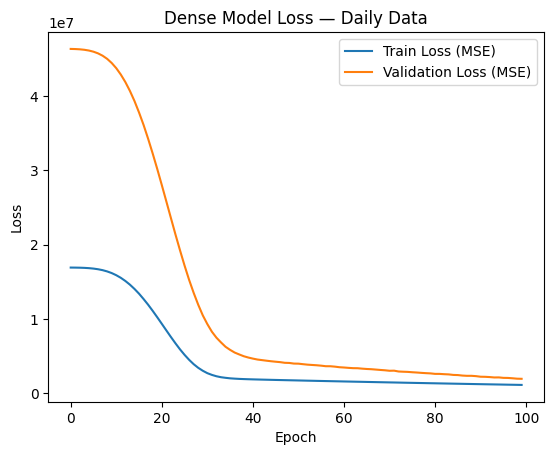

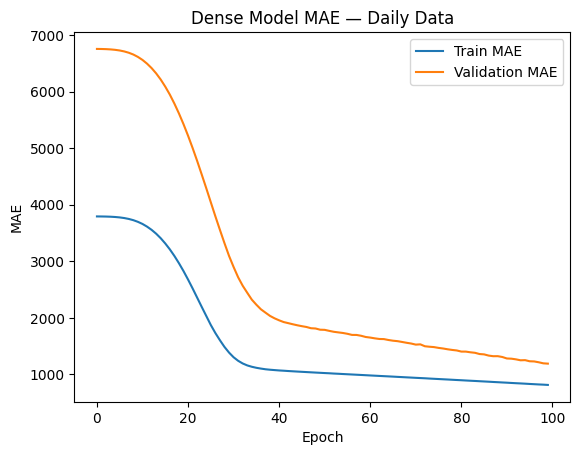

In [28]:
# Step 9: Plot training and validation curves for daily Dense model

import matplotlib.pyplot as plt

history = history_dense_day.history

# Plot MSE Loss
plt.figure()
plt.plot(history['loss'], label='Train Loss (MSE)')
plt.plot(history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dense Model Loss — Daily Data')
plt.legend()
plt.savefig('fig-6-Dense Model Loss — Daily Data.png')
plt.show()

# Plot MAE
plt.figure()
plt.plot(history['mae'], label='Train MAE')
plt.plot(history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Dense Model MAE — Daily Data')
plt.legend()
plt.savefig('fig-7-Dense Model MAE — Daily Data.png')
plt.show()


## Dense Model Evaluation — Daily Test Set

### Objective
After training and validation, we evaluate the Dense model on the **test set**,
which represents completely unseen future data.

This step provides an unbiased estimate of real-world performance.

We report:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)

Additionally, we visualize predicted vs actual bike demand to assess
prediction quality.


In [29]:
# Step 10: Evaluate Dense model on daily test set

# Evaluate metrics
test_loss, test_mae = dense_day_model.evaluate(
    X_test_day, y_test_day, verbose=0
)

print(f"Dense Model — Daily Test MSE: {test_loss:.2f}")
print(f"Dense Model — Daily Test MAE: {test_mae:.2f}")


Dense Model — Daily Test MSE: 2736660.25
Dense Model — Daily Test MAE: 1288.59


## Predicted vs Actual Bike Demand — Daily Dense Model

To visually assess prediction quality, we compare the Dense model’s predictions
against actual bike rental counts on the test set.

This plot helps identify:
- Systematic under- or over-prediction
- Ability to track demand trends
- Sensitivity to extreme values


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


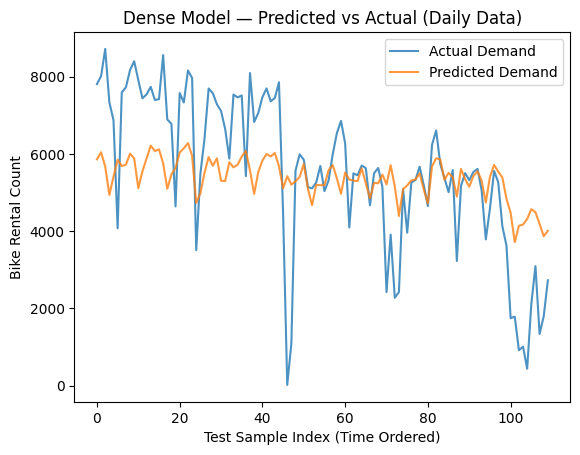

In [30]:
# Step 11: Predicted vs Actual plot for daily Dense model

import matplotlib.pyplot as plt

# Generate predictions
y_pred_day = dense_day_model.predict(X_test_day).flatten()

plt.figure()
plt.plot(y_test_day, label="Actual Demand", alpha=0.8)
plt.plot(y_pred_day, label="Predicted Demand", alpha=0.8)
plt.xlabel("Test Sample Index (Time Ordered)")
plt.ylabel("Bike Rental Count")
plt.title("Dense Model — Predicted vs Actual (Daily Data)")
plt.legend()
plt.savefig('fig-8-Dense Model — Predicted vs Actual (Daily Data).png')
plt.show()


## Dense Neural Network Training — Hourly Dataset

### Objective
In this step, we train the Dense (MLP) baseline model on the **hourly dataset**.

Each hour is treated as an independent sample using contextual, temporal, and
environmental features. Unlike the daily case, hourly data contains much stronger
short-term structure, allowing us to examine how far a feature-only model can go
without explicit temporal sequencing.

---

### Training Setup
- Input: Scaled hourly feature matrix
- Target: Hourly bike rental count (`cnt`)
- Loss function: Mean Squared Error (MSE)
- Metric: Mean Absolute Error (MAE)
- Optimizer: Adam
- Early stopping based on validation loss

The **same architecture and hyperparameters** used for daily data are retained
to ensure fair comparison.


In [31]:
# Step 12: Train Dense (MLP) model on hourly dataset

# Build model
dense_hour_model = build_dense_model(input_dim=X_train_hour.shape[1])

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train model
history_dense_hour = dense_hour_model.fit(
    X_train_hour, y_train_hour,
    validation_data=(X_val_hour, y_val_hour),
    epochs=100,
    batch_size=256,   # larger batch size for larger dataset
    callbacks=[early_stop],
    verbose=1
)

print("Dense model training on hourly dataset completed.")


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 48496.7383 - mae: 158.8576 - val_loss: 126658.4531 - val_mae: 277.2526
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45431.9961 - mae: 150.7767 - val_loss: 113074.7188 - val_mae: 256.4901
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34754.0273 - mae: 127.9227 - val_loss: 78673.6172 - val_mae: 211.1852
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23021.4082 - mae: 110.0949 - val_loss: 54841.6719 - val_mae: 178.8051
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20687.7695 - mae: 112.1005 - val_loss: 52236.1016 - val_mae: 175.1950
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20096.8906 - mae: 110.3570 - val_loss: 50760.8789 - val_mae: 172.8331
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19497.1406 - mae: 108.9236 - val_loss: 48976.0078 - val_mae: 170.0700
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18824.1523 - mae: 106.6513 - val_los

## Training and Validation Curves — Dense Model (Hourly Data)

To analyze the learning behavior of the Dense model on hourly data, we visualize:
- Training vs validation loss (MSE)
- Training vs validation MAE

These plots help assess:
- Convergence stability
- Generalization gap
- Whether the model benefits sufficiently from contextual features alone


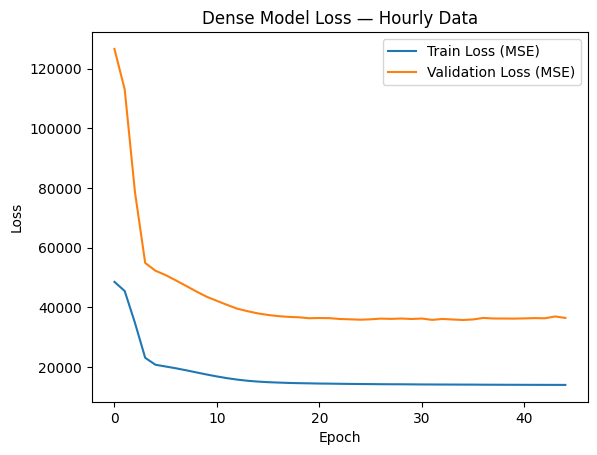

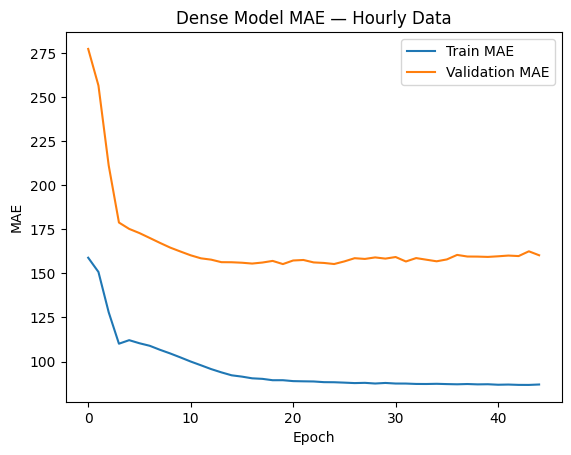

In [32]:
# Step 13: Plot training and validation curves for hourly Dense model

import matplotlib.pyplot as plt

history = history_dense_hour.history

# Plot MSE Loss
plt.figure()
plt.plot(history['loss'], label='Train Loss (MSE)')
plt.plot(history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dense Model Loss — Hourly Data')
plt.legend()
plt.savefig('fig-9-Dense Model Loss — Hourly Data.png')
plt.show()

# Plot MAE
plt.figure()
plt.plot(history['mae'], label='Train MAE')
plt.plot(history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Dense Model MAE — Hourly Data')
plt.legend()
plt.savefig('fig-10-Dense Model MAE — Hourly Data.png')
plt.show()


## Dense Model Evaluation — Hourly Test Set

### Objective
We now evaluate the Dense (MLP) baseline on the **hourly test set**, which contains
unseen future data.

This evaluation provides an unbiased estimate of real-world performance and allows
direct comparison with:
- Daily Dense performance
- Future LSTM and GRU models


In [33]:
# Step 14: Evaluate Dense model on hourly test set

test_loss_hour, test_mae_hour = dense_hour_model.evaluate(
    X_test_hour, y_test_hour, verbose=0
)

print(f"Dense Model — Hourly Test MSE: {test_loss_hour:.2f}")
print(f"Dense Model — Hourly Test MAE: {test_mae_hour:.2f}")


Dense Model — Hourly Test MSE: 31086.78
Dense Model — Hourly Test MAE: 135.98


## Predicted vs Actual Bike Demand — Hourly Dense Model

To visually assess the Dense model’s performance on hourly data, we compare
predicted bike rental counts against actual values on the test set.

This plot helps reveal:
- Whether the model tracks intraday demand patterns
- How well peaks and troughs are captured
- The extent to which temporal dynamics are missed without sequence modeling


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


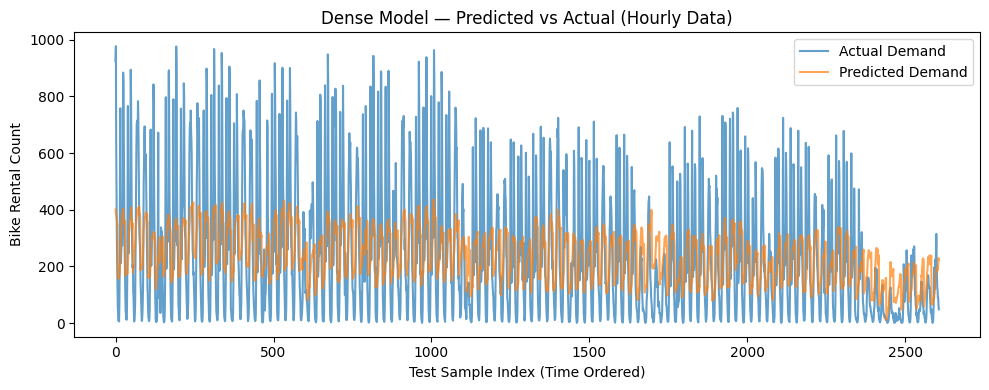

In [34]:
# Step 15: Predicted vs Actual plot for hourly Dense model

import matplotlib.pyplot as plt

# Generate predictions
y_pred_hour = dense_hour_model.predict(X_test_hour).flatten()

plt.figure(figsize=(10, 4))
plt.plot(y_test_hour, label="Actual Demand", alpha=0.7)
plt.plot(y_pred_hour, label="Predicted Demand", alpha=0.7)
plt.xlabel("Test Sample Index (Time Ordered)")
plt.ylabel("Bike Rental Count")
plt.title("Dense Model — Predicted vs Actual (Hourly Data)")
plt.legend()
plt.tight_layout()
plt.savefig('fig-11-Dense Model — Predicted vs Actual (Hourly Data).png')
plt.show()


## LSTM Model — Daily Dataset (3-Day Sequence)

### Objective
In this step, we train a Long Short-Term Memory (LSTM) model on the daily dataset
using a **3-day historical window**.

Unlike the Dense baseline, the LSTM explicitly models **temporal dependencies**
by learning from ordered sequences of past observations.

---

### Why LSTM for daily data
- PACF analysis showed meaningful dependency in the last few days
- Daily demand exhibits short-term temporal continuity
- LSTM can retain and forget information selectively across time steps

---

### Input–Output Structure
- Input shape: `(3 timesteps × 11 features)`
- Output: bike rental count for day `t`

---

### Architecture (Fixed for Fair Comparison)
- LSTM layer: 64 units
- Dense layer: 32 units (ReLU)
- Output layer: 1 unit (Linear)

The same architecture will be reused for:
- 7-day sequences
- 14-day sequences
to ensure fair comparison.


In [35]:
# step - 16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

def build_sequence_model(model_type, window_size, num_features):
    model = Sequential()
    model.add(Input(shape=(window_size, num_features)))

    if model_type == "LSTM":
        model.add(LSTM(64))
    elif model_type == "GRU":
        model.add(GRU(64))
    else:
        raise ValueError("model_type must be 'LSTM' or 'GRU'")

    # Fixed architecture for fairness
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss="mse",
        metrics=["mae"]
    )

    return model


In [36]:
lstm_day_3 = build_sequence_model(
    model_type="LSTM",
    window_size=3,
    num_features=11
)


In [37]:
gru_day_3 = build_sequence_model(
    model_type="GRU",
    window_size=3,
    num_features=11
)


## LSTM Training — Daily Dataset (3-Day Sequence)

### Objective
In this step, we train an LSTM model on the daily dataset using a **3-day temporal window**.
This is the first sequence-based model evaluated in the project.

The goal is to determine whether explicitly modeling short-term temporal dependencies
improves prediction performance over the Dense baseline.

---

### Experimental Setup
- Model type: LSTM
- Sequence length: 3 days
- Input shape: (3 timesteps × 11 features)
- Output: bike rental count for day `t`
- Architecture: fixed (as per unified builder)
- Loss: Mean Squared Error (MSE)
- Metric: Mean Absolute Error (MAE)
- Early stopping based on validation loss


In [38]:
# Step 17: Train LSTM model on daily data (3-day sequence)

# Extract sequences
X_train_lstm_3, y_train_lstm_3 = daily_sequences[3]["train"]
X_val_lstm_3, y_val_lstm_3     = daily_sequences[3]["val"]
X_test_lstm_3, y_test_lstm_3   = daily_sequences[3]["test"]

# Build LSTM model using unified builder
lstm_day_3 = build_sequence_model(
    model_type="LSTM",
    window_size=3,
    num_features=X_train_lstm_3.shape[2]
)

# Early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Train model
history_lstm_day_3 = lstm_day_3.fit(
    X_train_lstm_3, y_train_lstm_3,
    validation_data=(X_val_lstm_3, y_val_lstm_3),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("LSTM training completed — Daily data (3-day sequence).")


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 16997400.0000 - mae: 3810.0361 - val_loss: 46500812.0000 - val_mae: 6764.3848
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16987222.0000 - mae: 3808.7686 - val_loss: 46464948.0000 - val_mae: 6761.7319
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16956358.0000 - mae: 3804.9170 - val_loss: 46367588.0000 - val_mae: 6754.5269
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16890172.0000 - mae: 3796.2073 - val_loss: 46219444.0000 - val_mae: 6743.5513
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16804018.0000 - mae: 3784.9309 - val_loss: 46069804.0000 - val_mae: 6732.4482
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16717364.0000 - mae: 3773.2878 - val_loss: 45921556.0000 - val_mae: 6721.4307
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16631114.0000 - mae: 3761.7886 - val_loss: 45766884.0000 - val_mae: 6709.9146
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0

## Training and Validation Curves — LSTM (Daily, 3-Day Sequence)

To understand why the LSTM underperforms the Dense baseline on daily data,
we visualize training and validation loss and MAE.

These plots help identify:
- Overfitting behavior
- Stability of learning
- Whether the model benefits from additional epochs


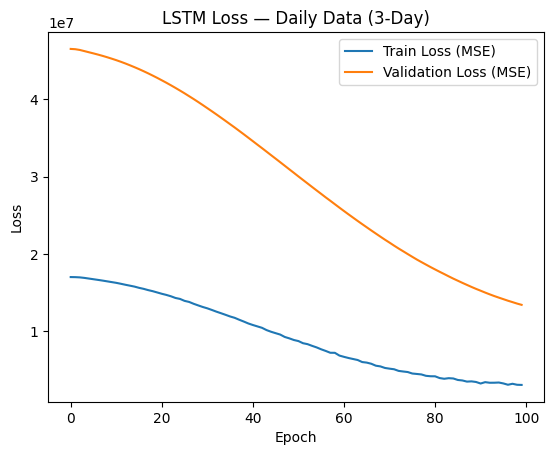

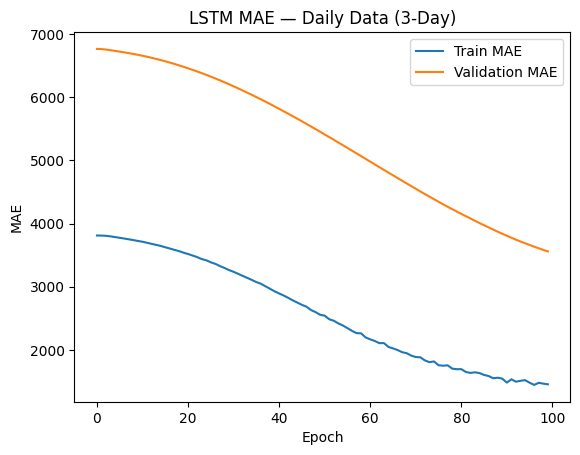

In [39]:
# Step 18: Plot training and validation curves for LSTM (daily, 3-day)

import matplotlib.pyplot as plt

history = history_lstm_day_3.history

# Plot MSE Loss
plt.figure()
plt.plot(history['loss'], label='Train Loss (MSE)')
plt.plot(history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss — Daily Data (3-Day)')
plt.legend()
plt.savefig('fig-12-LSTM Loss — Daily Data (3-Day).png')
plt.show()

# Plot MAE
plt.figure()
plt.plot(history['mae'], label='Train MAE')
plt.plot(history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('LSTM MAE — Daily Data (3-Day)')
plt.legend()
plt.savefig('fig-13-LSTM MAE — Daily Data (3-Day).png')
plt.show()


In [40]:
# Step 19: Evaluate LSTM model on daily test set (3-day sequence)

test_loss_lstm_3, test_mae_lstm_3 = lstm_day_3.evaluate(
    X_test_lstm_3, y_test_lstm_3, verbose=0
)

print(f"LSTM (3-day) — Daily Test MSE: {test_loss_lstm_3:.2f}")
print(f"LSTM (3-day) — Daily Test MAE: {test_mae_lstm_3:.2f}")


LSTM (3-day) — Daily Test MSE: 9071065.00
LSTM (3-day) — Daily Test MAE: 2699.20


## LSTM Model — Daily Dataset (7-Day Sequence)

### Objective
In this experiment, we train an LSTM model on the daily dataset using a
**7-day historical window**.

This sequence length is directly motivated by PACF analysis, which indicated
that meaningful direct temporal dependency exists up to approximately one week.

The goal is to evaluate whether extending the temporal context improves
generalization compared to the 3-day LSTM and Dense baseline.


In [41]:
# Step 20: Train LSTM model on daily data (7-day sequence)

# Extract sequences
X_train_lstm_7, y_train_lstm_7 = daily_sequences[7]["train"]
X_val_lstm_7, y_val_lstm_7     = daily_sequences[7]["val"]
X_test_lstm_7, y_test_lstm_7   = daily_sequences[7]["test"]

# Build LSTM model using unified builder
lstm_day_7 = build_sequence_model(
    model_type="LSTM",
    window_size=7,
    num_features=X_train_lstm_7.shape[2]
)

# Early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Train model
history_lstm_day_7 = lstm_day_7.fit(
    X_train_lstm_7, y_train_lstm_7,
    validation_data=(X_val_lstm_7, y_val_lstm_7),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("LSTM training completed — Daily data (7-day sequence).")


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 17108432.0000 - mae: 3827.2920 - val_loss: 46814584.0000 - val_mae: 6791.4385
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17066864.0000 - mae: 3821.9536 - val_loss: 46679128.0000 - val_mae: 6781.4595
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16969972.0000 - mae: 3809.2285 - val_loss: 46492000.0000 - val_mae: 6767.6475
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16862336.0000 - mae: 3794.9434 - val_loss: 46306200.0000 - val_mae: 6753.9067
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16760173.0000 - mae: 3781.3459 - val_loss: 46118120.0000 - val_mae: 6739.9683
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16649844.0000 - mae: 3767.0842 - val_loss: 45915056.0000 - val_mae: 6724.8872
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16527600.0000 - mae: 3750.5864 - val_loss: 45691804.0000 - val_mae: 6708.2690
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0

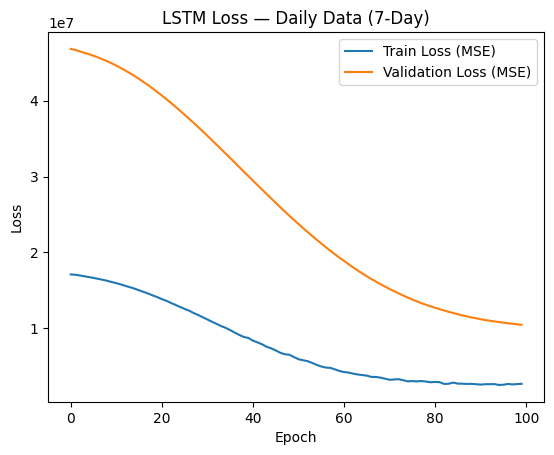

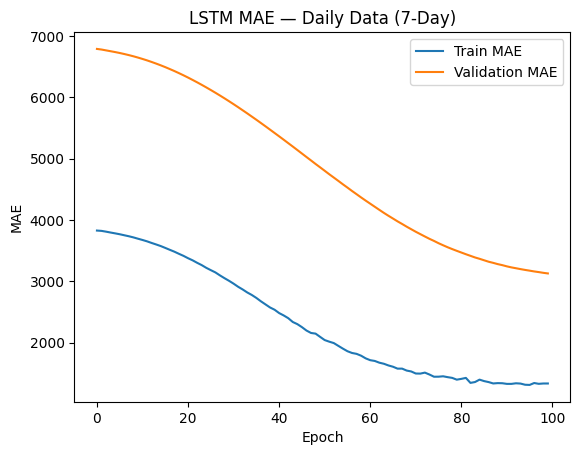

In [42]:
# Step 21: Plot training and validation curves for LSTM (daily, 7-day)

import matplotlib.pyplot as plt

history = history_lstm_day_7.history

# Plot MSE Loss
plt.figure()
plt.plot(history['loss'], label='Train Loss (MSE)')
plt.plot(history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss — Daily Data (7-Day)')
plt.legend()
plt.savefig('fig-14-LSTM MAE — Daily Data (7-Day).png')
plt.show()

# Plot MAE
plt.figure()
plt.plot(history['mae'], label='Train MAE')
plt.plot(history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('LSTM MAE — Daily Data (7-Day)')
plt.legend()
plt.savefig('fig-15-LSTM MAE — Daily Data (7-Day).png')
plt.show()


In [43]:
# Step 22: Evaluate LSTM model on daily test set (7-day sequence)

test_loss_lstm_7, test_mae_lstm_7 = lstm_day_7.evaluate(
    X_test_lstm_7, y_test_lstm_7, verbose=0
)

print(f"LSTM (7-day) — Daily Test MSE: {test_loss_lstm_7:.2f}")
print(f"LSTM (7-day) — Daily Test MAE: {test_mae_lstm_7:.2f}")


LSTM (7-day) — Daily Test MSE: 7091584.00
LSTM (7-day) — Daily Test MAE: 2363.97


## LSTM Model — Hourly Dataset (24-Hour Sequence)

### Objective
In this experiment, we train an LSTM model on the hourly dataset using a
**24-hour historical window**.

This setup allows the model to learn:
- Intraday demand cycles
- Peak and off-peak patterns
- Short-term temporal dependencies across hours

---

### Why 24-Hour Sequence
- ACF analysis showed strong periodicity at 24 hours
- Bike demand follows clear daily rhythms
- 24-hour context captures a full daily cycle

---

### Input–Output Structure
- Input shape: (24 timesteps × 12 features)
- Output: bike rental count for hour `t`

---

### Architecture
- LSTM layer: 64 units
- Dense layer: 32 units (ReLU)
- Dropout: 0.2
- Output layer: 1 unit (Linear)

This architecture is kept **identical** to daily LSTM models to ensure
fair comparison across datasets.


In [44]:
# Step 23: Train LSTM model on hourly data (24-hour sequence)

# Extract sequences
X_train_lstm_h24, y_train_lstm_h24 = hourly_sequences[24]["train"]
X_val_lstm_h24, y_val_lstm_h24     = hourly_sequences[24]["val"]
X_test_lstm_h24, y_test_lstm_h24   = hourly_sequences[24]["test"]

# Build LSTM model using unified builder
lstm_hour_24 = build_sequence_model(
    model_type="LSTM",
    window_size=24,
    num_features=X_train_lstm_h24.shape[2]
)

# Early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Train model
history_lstm_hour_24 = lstm_hour_24.fit(
    X_train_lstm_h24, y_train_lstm_h24,
    validation_data=(X_val_lstm_h24, y_val_lstm_h24),
    epochs=100,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

print("LSTM training completed — Hourly data (24-hour sequence).")


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 48038.2227 - mae: 157.4321 - val_loss: 124459.3125 - val_mae: 273.3670
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 44708.6328 - mae: 148.7272 - val_loss: 117574.0938 - val_mae: 262.9005
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 40674.1016 - mae: 139.7414 - val_loss: 109392.0078 - val_mae: 251.4400
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 36418.2227 - mae: 131.4279 - val_loss: 100432.7656 - val_mae: 240.0486
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 32322.3672 - mae: 124.3106 - val_loss: 91567.4844 - val_mae: 229.0644
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 29057.4941 - mae: 119.7396 - val_loss: 83576.9297 - val_mae: 219.0310
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 26634.5586 - mae: 117.4163 - val_loss: 77299.1406 - val_mae: 210.9039
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 25175.8242 - mae: 117.2229

## Training and Validation Curves — LSTM (Hourly, 24-Hour Sequence)

To analyze how well the LSTM learns intraday temporal patterns, we visualize
training and validation loss and MAE.

These curves help verify:
- Stable convergence
- Reduced generalization gap compared to Dense
- Effective use of 24-hour temporal context


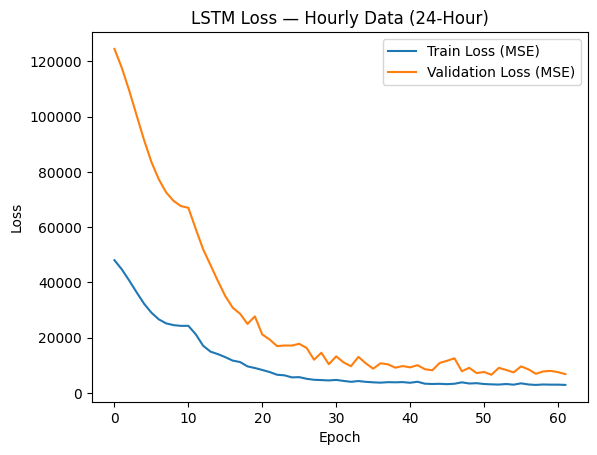

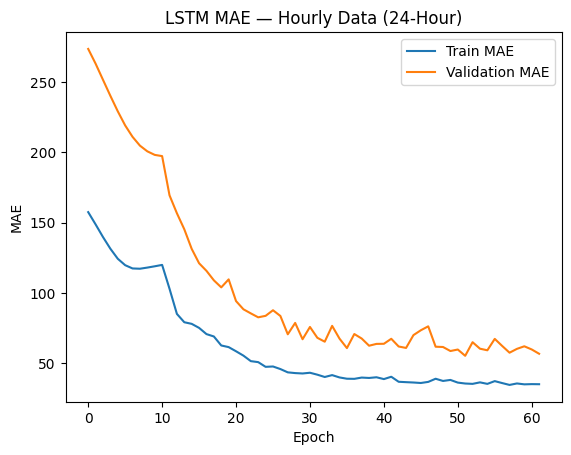

In [45]:
# Step 24: Plot training and validation curves for LSTM (hourly, 24-hour)

import matplotlib.pyplot as plt

history = history_lstm_hour_24.history

# Plot MSE Loss
plt.figure()
plt.plot(history['loss'], label='Train Loss (MSE)')
plt.plot(history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss — Hourly Data (24-Hour)')
plt.legend()
plt.savefig('fig-16-LSTM MAE — Daily Data (24-hour).png')
plt.show()

# Plot MAE
plt.figure()
plt.plot(history['mae'], label='Train MAE')
plt.plot(history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('LSTM MAE — Hourly Data (24-Hour)')
plt.legend()
plt.savefig('fig-17-LSTM MAE — Daily Data (24-hour).png')
plt.show()


In [46]:
# Step 25: Evaluate LSTM model on hourly test set (24-hour sequence)

test_loss_lstm_h24, test_mae_lstm_h24 = lstm_hour_24.evaluate(
    X_test_lstm_h24, y_test_lstm_h24, verbose=0
)

print(f"LSTM (24-hour) — Hourly Test MSE: {test_loss_lstm_h24:.2f}")
print(f"LSTM (24-hour) — Hourly Test MAE: {test_mae_lstm_h24:.2f}")


LSTM (24-hour) — Hourly Test MSE: 8739.86
LSTM (24-hour) — Hourly Test MAE: 61.37


## Predicted vs Actual Bike Demand — LSTM (Hourly, 24-Hour Sequence)

To visually assess the effectiveness of temporal modeling, we compare the LSTM
model’s predictions against actual hourly bike rental counts on the test set.

This plot highlights:
- Capture of intraday demand cycles
- Improved peak and trough prediction
- Reduced smoothing compared to Dense baseline


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


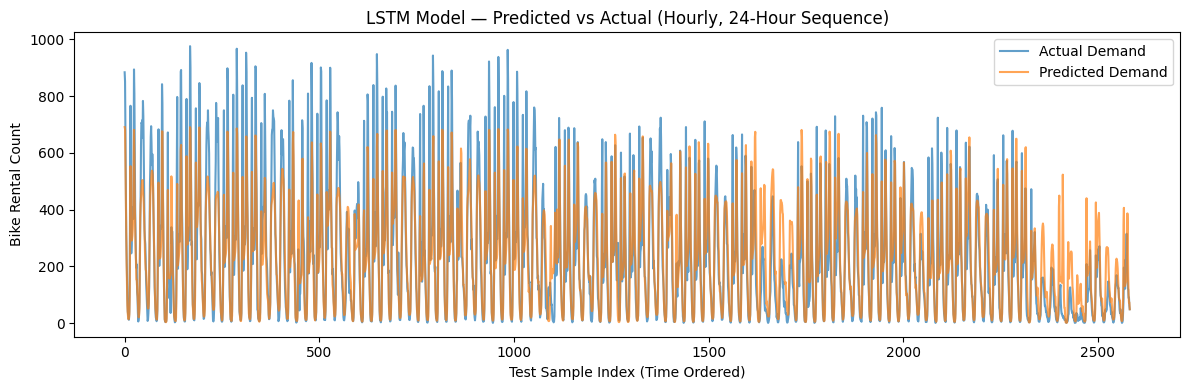

In [47]:
# Step 26: Predicted vs Actual plot for hourly LSTM (24-hour)

import matplotlib.pyplot as plt

# Generate predictions
y_pred_lstm_h24 = lstm_hour_24.predict(X_test_lstm_h24).flatten()

plt.figure(figsize=(12, 4))
plt.plot(y_test_lstm_h24, label="Actual Demand", alpha=0.7)
plt.plot(y_pred_lstm_h24, label="Predicted Demand", alpha=0.7)
plt.xlabel("Test Sample Index (Time Ordered)")
plt.ylabel("Bike Rental Count")
plt.title("LSTM Model — Predicted vs Actual (Hourly, 24-Hour Sequence)")
plt.legend()
plt.tight_layout()
plt.savefig('fig-18-LSTM Model — Predicted vs Actual (Hourly, 24-Hour Sequence).png')
plt.show()


## GRU Model — Hourly Dataset (24-Hour Sequence)

### Objective
In this step, we train a Gated Recurrent Unit (GRU) model on the hourly dataset
using a **24-hour historical window**.

GRU is a simplified alternative to LSTM with fewer parameters, often offering
comparable performance with improved efficiency.

---

### Why GRU
- Captures temporal dependencies like LSTM
- Fewer gates → faster convergence
- Useful for comparing efficiency vs accuracy trade-offs

---

### Experimental Consistency
- Same input sequences (24-hour)
- Same feature set (12 features)
- Same architecture depth and units
- Same optimizer and loss
- Only the recurrent cell type differs (GRU vs LSTM)


In [48]:
# Step 27: Train GRU model on hourly data (24-hour sequence)

# Reuse sequences already prepared
X_train_gru_h24, y_train_gru_h24 = hourly_sequences[24]["train"]
X_val_gru_h24, y_val_gru_h24     = hourly_sequences[24]["val"]
X_test_gru_h24, y_test_gru_h24   = hourly_sequences[24]["test"]

# Build GRU model using unified builder
gru_hour_24 = build_sequence_model(
    model_type="GRU",
    window_size=24,
    num_features=X_train_gru_h24.shape[2]
)

# Early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Train model
history_gru_hour_24 = gru_hour_24.fit(
    X_train_gru_h24, y_train_gru_h24,
    validation_data=(X_val_gru_h24, y_val_gru_h24),
    epochs=100,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

print("GRU training completed — Hourly data (24-hour sequence).")


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 46941.1758 - mae: 154.6589 - val_loss: 118467.1484 - val_mae: 264.1891
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 39855.9258 - mae: 138.1542 - val_loss: 105184.5547 - val_mae: 245.9767
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 33341.6523 - mae: 125.9134 - val_loss: 91924.0625 - val_mae: 229.5079
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 28336.3145 - mae: 118.6368 - val_loss: 80536.8750 - val_mae: 215.1363
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 25376.1230 - mae: 116.6727 - val_loss: 72627.7109 - val_mae: 204.7735
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 24077.9297 - mae: 117.3680 - val_loss: 68258.7422 - val_mae: 198.9803
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 23832.1484 - mae: 118.8378 - val_loss: 66275.6953 - val_mae: 196.3171
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 23705.1367 - mae: 119.7277 -

## Training and Validation Curves — GRU (Hourly, 24-Hour Sequence)

To analyze the learning behavior of the GRU model, we visualize training and
validation loss and MAE.

These curves help compare:
- Convergence speed vs LSTM
- Generalization gap
- Stability of training


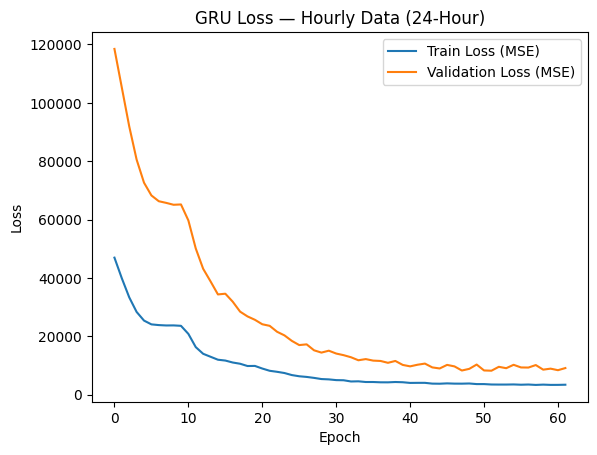

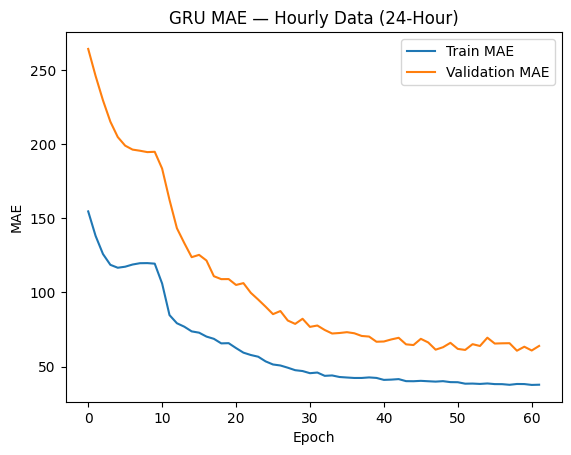

In [49]:
# Step 28: Plot training and validation curves for GRU (hourly, 24-hour)

import matplotlib.pyplot as plt

history = history_gru_hour_24.history

# Plot MSE Loss
plt.figure()
plt.plot(history['loss'], label='Train Loss (MSE)')
plt.plot(history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Loss — Hourly Data (24-Hour)')
plt.legend()
plt.savefig('fig-19-GRU Loss — Hourly Data (24-Hour).png')
plt.show()

# Plot MAE
plt.figure()
plt.plot(history['mae'], label='Train MAE')
plt.plot(history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('GRU MAE — Hourly Data (24-Hour)')
plt.legend()
plt.savefig('fig-20-GRU MAE — Hourly Data (24-Hour).png')
plt.show()


In [50]:
# Step 29: Evaluate GRU model on hourly test set (24-hour sequence)

test_loss_gru_h24, test_mae_gru_h24 = gru_hour_24.evaluate(
    X_test_gru_h24, y_test_gru_h24, verbose=0
)

print(f"GRU (24-hour) — Hourly Test MSE: {test_loss_gru_h24:.2f}")
print(f"GRU (24-hour) — Hourly Test MAE: {test_mae_gru_h24:.2f}")


GRU (24-hour) — Hourly Test MSE: 9201.51
GRU (24-hour) — Hourly Test MAE: 62.60


## Final Model Comparison — Hourly Bike Demand Forecasting

This section presents a consolidated comparison of all three models:
- Dense (feature-based baseline)
- LSTM (sequence-based)
- GRU (efficient sequence-based)

The comparison is performed on the hourly dataset using a 24-hour temporal window,
where temporal dependency is strongest.


,Model,Test_MAE,Test_MSE
0,Dense,135.977737,31086.775391
1,LSTM,61.367035,8739.856445
2,GRU,62.596313,9201.510742


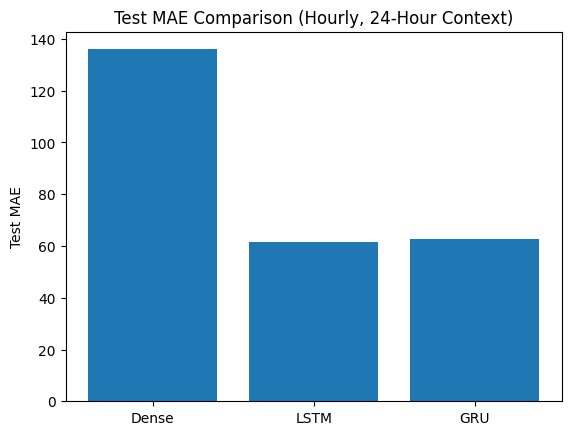

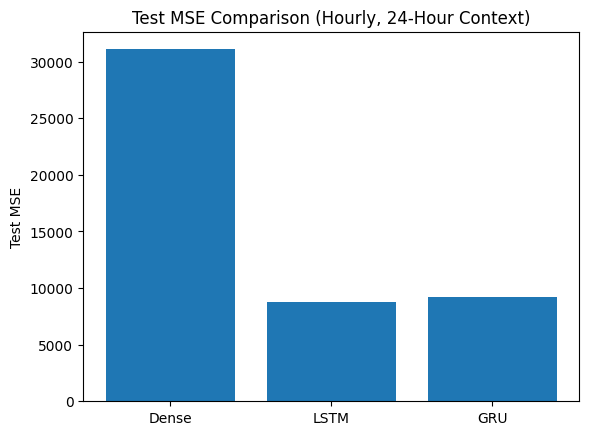

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# Collect final test metrics
# -------------------------------
results = pd.DataFrame({
    "Model": ["Dense", "LSTM", "GRU"],
    "Test_MAE": [test_mae_hour, test_mae_lstm_h24, test_mae_gru_h24],
    "Test_MSE": [test_loss_hour, test_loss_lstm_h24, test_loss_gru_h24]
})

display(results)

# -------------------------------
# Bar Chart — Test MAE
# -------------------------------
plt.figure()
plt.bar(results["Model"], results["Test_MAE"])
plt.ylabel("Test MAE")
plt.title("Test MAE Comparison (Hourly, 24-Hour Context)")
plt.savefig('fig-21-Test MAE Comparison (Hourly, 24-Hour Context).png')
plt.show()

# -------------------------------
# Bar Chart — Test MSE
# -------------------------------
plt.figure()
plt.bar(results["Model"], results["Test_MSE"])
plt.ylabel("Test MSE")
plt.title("Test MSE Comparison (Hourly, 24-Hour Context)")
plt.savefig('fig-22-Test MSE Comparison (Hourly, 24-Hour Context).png')
plt.show()


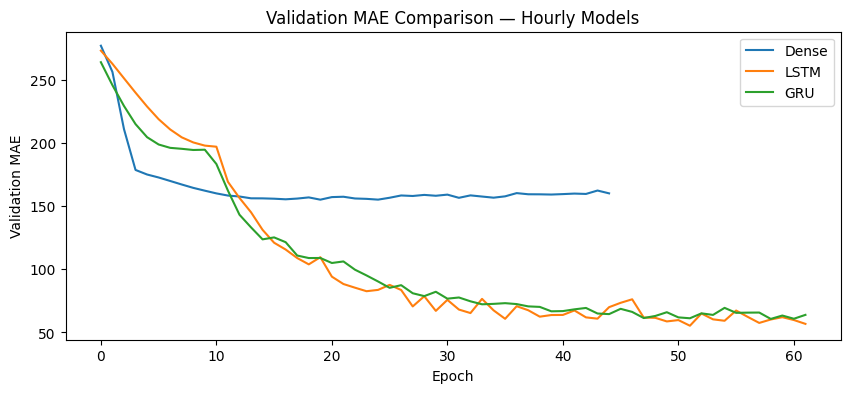

In [52]:
plt.figure(figsize=(10,4))
plt.plot(history_dense_hour.history["val_mae"], label="Dense")
plt.plot(history_lstm_hour_24.history["val_mae"], label="LSTM")
plt.plot(history_gru_hour_24.history["val_mae"], label="GRU")
plt.xlabel("Epoch")
plt.ylabel("Validation MAE")
plt.title("Validation MAE Comparison — Hourly Models")
plt.legend()
plt.savefig('fig-23-Validation MAE Comparison — Hourly Models.png')
plt.show()


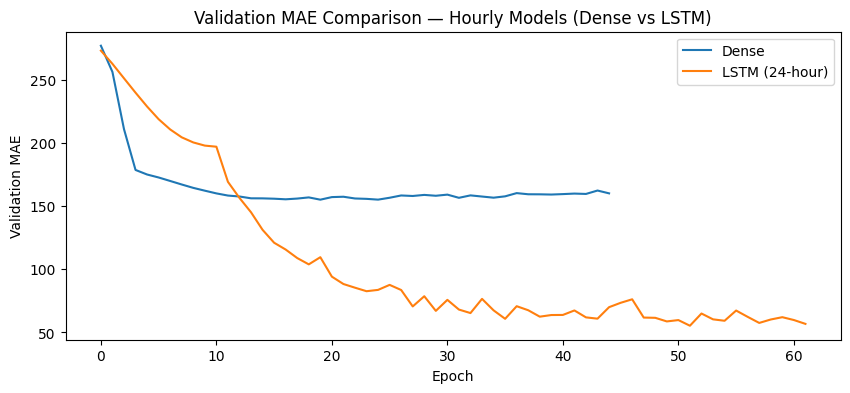

In [53]:
plt.figure(figsize=(10,4))
plt.plot(history_dense_hour.history["val_mae"], label="Dense")
plt.plot(history_lstm_hour_24.history["val_mae"], label="LSTM (24-hour)")
plt.xlabel("Epoch")
plt.ylabel("Validation MAE")
plt.title("Validation MAE Comparison — Hourly Models (Dense vs LSTM)")
plt.legend()
plt.savefig('fig-24-Validation MAE Comparison — Hourly Models (Dense vs LSTM).png')
plt.show()
